In [1]:
# Importing libraries
import json, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# lisimport os
root = './'
for f in os.listdir(root):
    path = root+f
    if os.path.isdir(path):    
        print('-------', f, '-------')
        for i in os.listdir(path):
            print(path+'/'+i)
        

------- .ipynb_checkpoints -------
./.ipynb_checkpoints/loan_default_prediction-checkpoint.ipynb
------- final_submission -------
./final_submission/sample_submission.csv
------- test -------
./test/accounts_data_test.json
./test/enquiry_data_test.json
./test/test_flag.csv
------- train -------
./train/accounts_data_train.json
./train/enquiry_data_train.json
./train/train_flag.csv


In [3]:
# Loading train Dataset
account = pd.read_json('./train/accounts_data_train.json')
enquiry = pd.read_json('./train/enquiry_data_train.json')
flag = pd.read_csv('./train/train_flag.csv')

In [4]:
d1 = account.iloc[0,0]
d2 = account.iloc[0,1]
print(d1)
print(d2)

{'credit_type': 'Consumer credit', 'loan_amount': 272745.0, 'amount_overdue': 0.0, 'open_date': '2018-09-22', 'closed_date': '2020-02-22', 'payment_hist_string': '000000000000000000000010000000000000000000000000000', 'uid': 'AAA09044550'}
{'credit_type': 'Consumer credit', 'loan_amount': 4500.0, 'amount_overdue': 0.0, 'open_date': '2018-03-08', 'closed_date': '2019-07-25', 'payment_hist_string': '000000000000000014044000000000000000000000000000', 'uid': 'AAA09044550'}


In [5]:
l = list()
for i in account.values:
    for val in i:
        if val:
            l.append(val)
acc_df = pd.DataFrame.from_records(l)
acc_df.head()

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid
0,Consumer credit,272745.000,0.0,2018-09-22,2020-02-22,0000000000000000000000100000000000000000000000...,AAA09044550
1,Consumer credit,4500.000,0.0,2018-03-08,2019-07-25,000000000000000014044000000000000000000000000000,AAA09044550
2,Credit card,80996.445,0.0,2020-06-29,None,000000000000000000,AAA10545297
3,Consumer credit,43771.500,0.0,2020-06-09,2020-09-09,000000000,AAA14112888
4,Credit card,10480.500,0.0,2014-09-10,None,0000000000000000000000000000000000000000000000...,AAA20326915


In [6]:
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245310 entries, 0 to 1245309
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   credit_type          1245310 non-null  object 
 1   loan_amount          1245307 non-null  float64
 2   amount_overdue       1245310 non-null  float64
 3   open_date            1245310 non-null  object 
 4   closed_date          782275 non-null   object 
 5   payment_hist_string  1245310 non-null  object 
 6   uid                  1245310 non-null  object 
dtypes: float64(2), object(5)
memory usage: 66.5+ MB


In [7]:
acc_df.loan_amount.describe()

count    1.245307e+06
mean     3.523541e+05
std      1.109812e+06
min      0.000000e+00
25%      5.114700e+04
50%      1.246590e+05
75%      3.087000e+05
max      3.960000e+08
Name: loan_amount, dtype: float64

In [8]:
acc_df.loan_amount.value_counts()

0.000         47585
225000.000    42453
135000.000    37384
90000.000     27056
450000.000    26862
              ...  
79620.750         1
78158.430         1
64192.680         1
60749.595         1
161828.280        1
Name: loan_amount, Length: 189286, dtype: int64

In [9]:
acc_df[acc_df.loan_amount.isna()]

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid
65605,Another type of loan,NaN,0.0,2021-01-01,2020-10-21,,BJV01354901
149202,Another type of loan,NaN,0.0,2021-01-01,None,,DCX71532515
613183,Another type of loan,NaN,0.0,2021-01-01,None,,MVG95017452


In [10]:
acc_df[acc_df.credit_type=='Another type of loan'].loan_amount.value_counts()

0.000          454
225000.000      16
450000.000      11
135000.000      10
1350000.000      8
              ... 
216297.765       1
72238.950        1
1233.000         1
1723500.000      1
70611.435        1
Name: loan_amount, Length: 174, dtype: int64

In [11]:
# None values in closed_date column,means loan is running and not closed yet, so for calculation purpose, imput date with 
# today's date (take some fix date e.g. '20-Nov-2022', so if calculate later result would be same
acc_df.closed_date.fillna('2022-11-20', inplace=True)
acc_df.loan_amount.fillna('225000.000', inplace=True)
acc_df.head()

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid
0,Consumer credit,272745,0.0,2018-09-22,2020-02-22,0000000000000000000000100000000000000000000000...,AAA09044550
1,Consumer credit,4500,0.0,2018-03-08,2019-07-25,000000000000000014044000000000000000000000000000,AAA09044550
2,Credit card,80996.4,0.0,2020-06-29,2022-11-20,000000000000000000,AAA10545297
3,Consumer credit,43771.5,0.0,2020-06-09,2020-09-09,000000000,AAA14112888
4,Credit card,10480.5,0.0,2014-09-10,2022-11-20,0000000000000000000000000000000000000000000000...,AAA20326915


In [12]:
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245310 entries, 0 to 1245309
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   credit_type          1245310 non-null  object 
 1   loan_amount          1245310 non-null  object 
 2   amount_overdue       1245310 non-null  float64
 3   open_date            1245310 non-null  object 
 4   closed_date          1245310 non-null  object 
 5   payment_hist_string  1245310 non-null  object 
 6   uid                  1245310 non-null  object 
dtypes: float64(1), object(6)
memory usage: 66.5+ MB


In [13]:
# # Creating new column of unique user id in dataframe
# # account['uid'] = account.iloc[:,0].apply(lambda x:x.get('uid'))
# # account.head(10)
# col = account.pop('uid')
# account.insert(0,'uid',col)
# account.head(10)

In [14]:
enquiry.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,"{'enquiry_type': 'Interbank credit', 'enquiry_...","{'enquiry_type': 'Mobile operator loan', 'enqu...","{'enquiry_type': 'Mobile operator loan', 'enqu...","{'enquiry_type': 'Interbank credit', 'enquiry_...","{'enquiry_type': 'Cash loan (non-earmarked)', ...","{'enquiry_type': 'Mortgage', 'enquiry_amt': 44...","{'enquiry_type': 'Revolving loans', 'enquiry_a...","{'enquiry_type': 'Interbank credit', 'enquiry_...",{'enquiry_type': 'Loan for purchase of shares ...,"{'enquiry_type': 'Revolving loans', 'enquiry_a...",...,None,None,None,None,None,None,None,None,None,None
1,"{'enquiry_type': 'Cash loans', 'enquiry_amt': ...","{'enquiry_type': 'Interbank credit', 'enquiry_...","{'enquiry_type': 'Car loan', 'enquiry_amt': 12...","{'enquiry_type': 'Revolving loans', 'enquiry_a...","{'enquiry_type': 'Car loan', 'enquiry_amt': 12...","{'enquiry_type': 'Another type of loan', 'enqu...",{'enquiry_type': 'Loan for the purchase of equ...,"{'enquiry_type': 'Real estate loan', 'enquiry_...","{'enquiry_type': 'Credit card', 'enquiry_amt':...","{'enquiry_type': 'Unknown type of loan', 'enqu...",...,None,None,None,None,None,None,None,None,None,None
2,"{'enquiry_type': 'Revolving loans', 'enquiry_a...","{'enquiry_type': 'Consumer credit', 'enquiry_a...","{'enquiry_type': 'Interbank credit', 'enquiry_...","{'enquiry_type': 'Revolving loans', 'enquiry_a...",{'enquiry_type': 'Loan for purchase of shares ...,"{'enquiry_type': 'Cash loans', 'enquiry_amt': ...","{'enquiry_type': 'Cash loan (non-earmarked)', ...","{'enquiry_type': 'Another type of loan', 'enqu...","{'enquiry_type': 'Consumer credit', 'enquiry_a...","{'enquiry_type': 'Credit card', 'enquiry_amt':...",...,None,None,None,None,None,None,None,None,None,None
3,{'enquiry_type': 'Loan for purchase of shares ...,{'enquiry_type': 'Loan for working capital rep...,"{'enquiry_type': 'Consumer credit', 'enquiry_a...",{'enquiry_type': 'Loan for the purchase of equ...,"{'enquiry_type': 'Another type of loan', 'enqu...",{'enquiry_type': 'Loan for the purchase of equ...,"{'enquiry_type': 'Unknown type of loan', 'enqu...","{'enquiry_type': 'Cash loan (non-earmarked)', ...","{'enquiry_type': 'Cash loans', 'enquiry_amt': ...","{'enquiry_type': 'Consumer credit', 'enquiry_a...",...,None,None,None,None,None,None,None,None,None,None
4,"{'enquiry_type': 'Mobile operator loan', 'enqu...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [15]:
e1 = enquiry.iloc[0,0]
e2 = enquiry.iloc[0,1]
e3 = enquiry.iloc[0,2]
e4 = enquiry.iloc[0,3]
print(e1)
print(e2)
print(e3)
print(e4)

{'enquiry_type': 'Interbank credit', 'enquiry_amt': 168839, 'enquiry_date': '2020-11-08', 'uid': 'AAA08065248'}
{'enquiry_type': 'Mobile operator loan', 'enquiry_amt': 268392, 'enquiry_date': '2020-09-20', 'uid': 'AAA08065248'}
{'enquiry_type': 'Mobile operator loan', 'enquiry_amt': 36082, 'enquiry_date': '2020-06-19', 'uid': 'AAA08065248'}
{'enquiry_type': 'Interbank credit', 'enquiry_amt': 180467, 'enquiry_date': '2019-10-22', 'uid': 'AAA08065248'}


In [16]:
l = list()
for i in enquiry.values:
    for val in i:
        if val:
            l.append(val)
enq_df = pd.DataFrame.from_records(l)
enq_df.head()

,enquiry_type,enquiry_amt,enquiry_date,uid
0,Interbank credit,168839,2020-11-08,AAA08065248
1,Mobile operator loan,268392,2020-09-20,AAA08065248
2,Mobile operator loan,36082,2020-06-19,AAA08065248
3,Interbank credit,180467,2019-10-22,AAA08065248
4,Cash loan (non-earmarked),227459,2020-05-24,AAA08065248


In [17]:
enq_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909926 entries, 0 to 1909925
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   enquiry_type  1909926 non-null  object
 1   enquiry_amt   1909926 non-null  int64 
 2   enquiry_date  1909926 non-null  object
 3   uid           1909926 non-null  object
dtypes: int64(1), object(3)
memory usage: 58.3+ MB


In [18]:
# Printing Unique Users ids in both dataframe
acc_df.uid.nunique(), enq_df.uid.nunique()

(223918, 261383)

In [19]:
acc_df['credit_type'].value_counts()

Consumer credit                                 908741
Credit card                                     292422
Car loan                                         20237
Mortgage                                         13196
Microloan                                         7766
Loan for business development                     1466
Another type of loan                               732
Unknown type of loan                               374
Loan for working capital replenishment             320
Real estate loan                                    17
Cash loan (non-earmarked)                           17
Loan for the purchase of equipment                  16
Loan for purchase of shares (margin lending)         4
Interbank credit                                     1
Mobile operator loan                                 1
Name: credit_type, dtype: int64

In [20]:
# # Creating new column of unique user id in dataframe
# col = enquiry.iloc[:,0].apply(lambda x:x.get('uid'))
# enquiry.insert(0, 'uid', col)
# enquiry.head(10)


In [21]:
flag.head()

,uid,NAME_CONTRACT_TYPE,TARGET
0,XDA69787158,Cash loans,0
1,BSE47789733,Cash loans,0
2,NTJ92213825,Cash loans,0
3,TCQ47571695,Cash loans,0
4,WJZ68772744,Cash loans,0


In [22]:
flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261383 entries, 0 to 261382
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   uid                 261383 non-null  object
 1   NAME_CONTRACT_TYPE  261383 non-null  object
 2   TARGET              261383 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.0+ MB


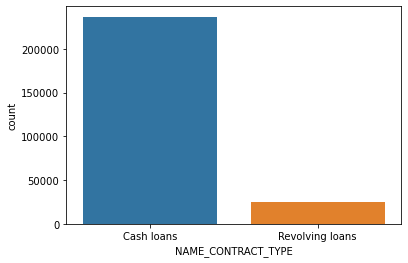

In [23]:
sns.countplot(data = flag, x= 'NAME_CONTRACT_TYPE')
plt.show()

In [24]:
print(flag['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100)

Cash loans         90.489435
Revolving loans     9.510565
Name: NAME_CONTRACT_TYPE, dtype: float64


**Cash loans are more than the Revolving loans.** 

### Merging dataframes 

In [23]:
# Merging flag and Account data
# account dataframe have less unique id (Uid, 223918) comprasion to flag dataset (261383) 
acc_flag_df = acc_df.merge(flag, how='left', on='uid')
acc_flag_df.head()

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid,NAME_CONTRACT_TYPE,TARGET
0,Consumer credit,272745,0.0,2018-09-22,2020-02-22,0000000000000000000000100000000000000000000000...,AAA09044550,Cash loans,0
1,Consumer credit,4500,0.0,2018-03-08,2019-07-25,000000000000000014044000000000000000000000000000,AAA09044550,Cash loans,0
2,Credit card,80996.4,0.0,2020-06-29,2022-11-20,000000000000000000,AAA10545297,Cash loans,0
3,Consumer credit,43771.5,0.0,2020-06-09,2020-09-09,000000000,AAA14112888,Cash loans,0
4,Credit card,10480.5,0.0,2014-09-10,2022-11-20,0000000000000000000000000000000000000000000000...,AAA20326915,Cash loans,0


In [23]:
acc_flag_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1245310 entries, 0 to 1245309
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   credit_type          1245310 non-null  object 
 1   loan_amount          1245310 non-null  object 
 2   amount_overdue       1245310 non-null  float64
 3   open_date            1245310 non-null  object 
 4   closed_date          1245310 non-null  object 
 5   payment_hist_string  1245310 non-null  object 
 6   uid                  1245310 non-null  object 
 7   NAME_CONTRACT_TYPE   1245310 non-null  object 
 8   TARGET               1245310 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 95.0+ MB


In [24]:
# Merging flag dataframe with enquiry dataframe
enq_flag_df = enq_df.merge(flag, how='left', on='uid')
enq_flag_df.head()

,enquiry_type,enquiry_amt,enquiry_date,uid,NAME_CONTRACT_TYPE,TARGET
0,Interbank credit,168839,2020-11-08,AAA08065248,Revolving loans,0
1,Mobile operator loan,268392,2020-09-20,AAA08065248,Revolving loans,0
2,Mobile operator loan,36082,2020-06-19,AAA08065248,Revolving loans,0
3,Interbank credit,180467,2019-10-22,AAA08065248,Revolving loans,0
4,Cash loan (non-earmarked),227459,2020-05-24,AAA08065248,Revolving loans,0


In [25]:
enq_flag_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1909926 entries, 0 to 1909925
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   enquiry_type        1909926 non-null  object
 1   enquiry_amt         1909926 non-null  int64 
 2   enquiry_date        1909926 non-null  object
 3   uid                 1909926 non-null  object
 4   NAME_CONTRACT_TYPE  1909926 non-null  object
 5   TARGET              1909926 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 102.0+ MB


In [26]:
enq_flag_df.enquiry_type.value_counts()

Cash loans                                      303108
Revolving loans                                 120181
Mobile operator loan                             99479
Real estate loan                                 99328
Microloan                                        99324
Unknown type of loan                             99280
Loan for purchase of shares (margin lending)     99230
Mortgage                                         99216
Credit card                                      99208
Another type of loan                             99154
Loan for the purchase of equipment               99152
Interbank credit                                 99063
Car loan                                         98994
Loan for business development                    98900
Cash loan (non-earmarked)                        98831
Loan for working capital replenishment           98814
Consumer credit                                  98664
Name: enquiry_type, dtype: int64

### EDA

1. Analyzing account and flag merged dataset, in dataset a column "payment_hist_string" which includes the month's history in which a borrower default loan. If string '000' borrower default loan by 0 days and if any '0xx' then borrower default the loan by xx days in that particular month.

In [25]:
acc_flag_df['overdue_month'] = acc_flag_df.payment_hist_string.apply(lambda s:[s[i:i+3] for i in range(0,len(s),3)])
acc_flag_df['overdue_month'].head(10)

0    [000, 000, 000, 000, 000, 000, 000, 010, 000, ...
1    [000, 000, 000, 000, 000, 014, 044, 000, 000, ...
2                       [000, 000, 000, 000, 000, 000]
3                                      [000, 000, 000]
4    [000, 000, 000, 000, 000, 000, 000, 000, 000, ...
5    [000, 000, 000, 000, 000, 000, 000, 000, 000, ...
6    [000, 000, 000, 000, 000, 000, 000, 000, 000, ...
7                                      [000, 000, 000]
8                                                [000]
9                                                [000]
Name: overdue_month, dtype: object

In [26]:
acc_flag_df['overdue_month_count'] = acc_flag_df.overdue_month.apply(lambda x:len(x) - x.count('000'))
acc_flag_df.head()
# acc_flag_df[:10].default_time.apply(lambda x:len(x) - x.count('000'))

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid,NAME_CONTRACT_TYPE,TARGET,overdue_month,overdue_month_count
0,Consumer credit,272745,0.0,2018-09-22,2020-02-22,0000000000000000000000100000000000000000000000...,AAA09044550,Cash loans,0,"[000, 000, 000, 000, 000, 000, 000, 010, 000, ...",1
1,Consumer credit,4500,0.0,2018-03-08,2019-07-25,000000000000000014044000000000000000000000000000,AAA09044550,Cash loans,0,"[000, 000, 000, 000, 000, 014, 044, 000, 000, ...",2
2,Credit card,80996.4,0.0,2020-06-29,2022-11-20,000000000000000000,AAA10545297,Cash loans,0,"[000, 000, 000, 000, 000, 000]",0
3,Consumer credit,43771.5,0.0,2020-06-09,2020-09-09,000000000,AAA14112888,Cash loans,0,"[000, 000, 000]",0
4,Credit card,10480.5,0.0,2014-09-10,2022-11-20,0000000000000000000000000000000000000000000000...,AAA20326915,Cash loans,0,"[000, 000, 000, 000, 000, 000, 000, 000, 000, ...",31


In [27]:
acc_flag_df.rename(columns={'NAME_CONTRACT_TYPE':'contract_type',
                           'TARGET':'target',
                            
                           }, inplace=True)
acc_flag_df.drop('payment_hist_string', axis=1, inplace=True)
acc_flag_df.head()

,credit_type,loan_amount,amount_overdue,open_date,closed_date,uid,contract_type,target,overdue_month,overdue_month_count
0,Consumer credit,272745,0.0,2018-09-22,2020-02-22,AAA09044550,Cash loans,0,"[000, 000, 000, 000, 000, 000, 000, 010, 000, ...",1
1,Consumer credit,4500,0.0,2018-03-08,2019-07-25,AAA09044550,Cash loans,0,"[000, 000, 000, 000, 000, 014, 044, 000, 000, ...",2
2,Credit card,80996.4,0.0,2020-06-29,2022-11-20,AAA10545297,Cash loans,0,"[000, 000, 000, 000, 000, 000]",0
3,Consumer credit,43771.5,0.0,2020-06-09,2020-09-09,AAA14112888,Cash loans,0,"[000, 000, 000]",0
4,Credit card,10480.5,0.0,2014-09-10,2022-11-20,AAA20326915,Cash loans,0,"[000, 000, 000, 000, 000, 000, 000, 000, 000, ...",31


In [30]:
pd.set_option('display.max_rows', None)
(acc_flag_df.overdue_month_count.value_counts(ascending=True))


81          1
56          1
57          1
60          1
61          1
59          1
50          1
66          1
62          1
51          1
48          2
78          2
47          2
68          2
55          2
54          2
53          2
45          2
52          3
65          3
64          3
58          3
49          4
46          5
43          6
39          6
41          7
42          8
44         10
37         10
40         13
35         14
38         19
36         22
33         31
31         38
29         38
30         39
32         41
28         43
27         58
26         73
25         77
24         81
23        109
20        136
22        140
19        153
21        154
18        214
17        271
16        296
15        383
34        449
14        451
13        594
12        719
11        866
10       1079
9        1356
8        1723
7        2250
6        3270
5        4808
4        7027
3       11623
2       21683
1       45494
0     1139381
Name: overdue_month_count, dtype: 

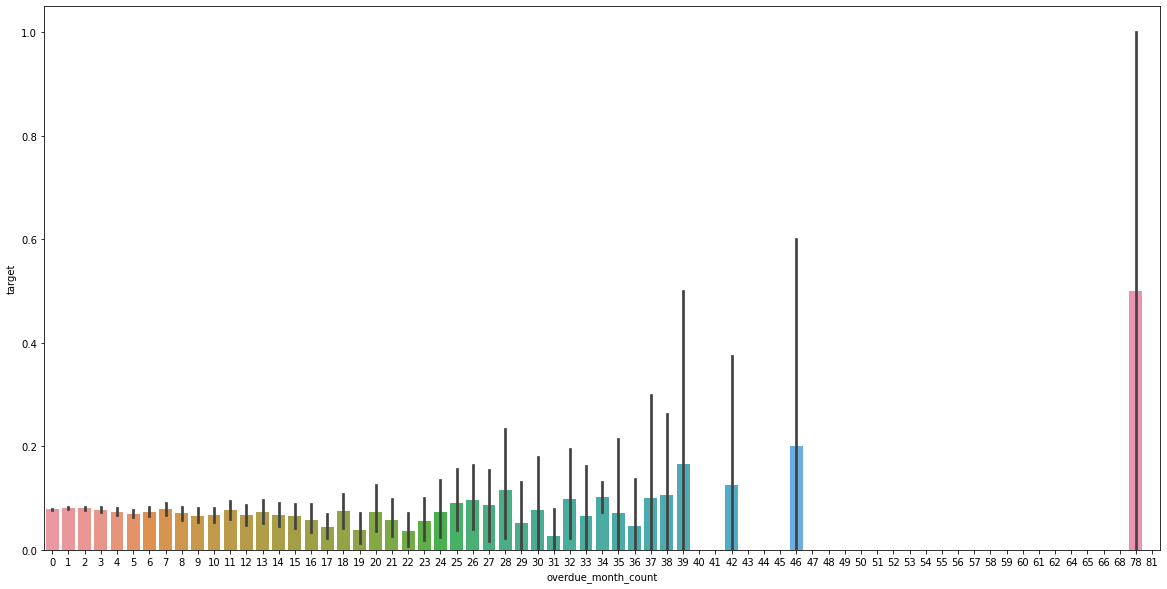

In [34]:
plt.figure(figsize=(20,10))
sns.barplot(data= acc_flag_df, x='overdue_month_count', y='target')
plt.show()

**1:Bad loan     0:Good loan** </br>
**From Above plot we conclude that:**
* User with maxium number of total overdue month count tends to default there loan. 
* User with less number of overdue month (<24, upto 2 years) will less default there loan.

In [35]:
acc_flag_df.head()

,credit_type,loan_amount,amount_overdue,open_date,closed_date,uid,contract_type,target,overdue_month,overdue_month_count
0,Consumer credit,272745,0.0,2018-09-22,2020-02-22,AAA09044550,Cash loans,0,"[000, 000, 000, 000, 000, 000, 000, 010, 000, ...",1
1,Consumer credit,4500,0.0,2018-03-08,2019-07-25,AAA09044550,Cash loans,0,"[000, 000, 000, 000, 000, 014, 044, 000, 000, ...",2
2,Credit card,80996.4,0.0,2020-06-29,2022-11-20,AAA10545297,Cash loans,0,"[000, 000, 000, 000, 000, 000]",0
3,Consumer credit,43771.5,0.0,2020-06-09,2020-09-09,AAA14112888,Cash loans,0,"[000, 000, 000]",0
4,Credit card,10480.5,0.0,2014-09-10,2022-11-20,AAA20326915,Cash loans,0,"[000, 000, 000, 000, 000, 000, 000, 000, 000, ...",31


In [28]:
acc_flag_df['closed_date'] = pd.to_datetime(acc_flag_df['closed_date'])
acc_flag_df['open_date'] = pd.to_datetime(acc_flag_df['open_date'])

acc_flag_df['loan_age']= (acc_flag_df.closed_date - acc_flag_df.open_date)/np.timedelta64(1, 'Y')
# (pd.to_datetime(acc_flag_df.closed_date) - pd.to_datetime(acc_flag_df.open_date))/np.timedelta64(1, 'Y')
acc_flag_df.head()

,credit_type,loan_amount,amount_overdue,open_date,closed_date,uid,contract_type,target,overdue_month,overdue_month_count,loan_age
0,Consumer credit,272745,0.0,2018-09-22,2020-02-22,AAA09044550,Cash loans,0,"[000, 000, 000, 000, 000, 000, 000, 010, 000, ...",1,1.418236
1,Consumer credit,4500,0.0,2018-03-08,2019-07-25,AAA09044550,Cash loans,0,"[000, 000, 000, 000, 000, 014, 044, 000, 000, ...",2,1.379905
2,Credit card,80996.4,0.0,2020-06-29,2022-11-20,AAA10545297,Cash loans,0,"[000, 000, 000, 000, 000, 000]",0,2.392931
3,Consumer credit,43771.5,0.0,2020-06-09,2020-09-09,AAA14112888,Cash loans,0,"[000, 000, 000]",0,0.251887
4,Credit card,10480.5,0.0,2014-09-10,2022-11-20,AAA20326915,Cash loans,0,"[000, 000, 000, 000, 000, 000, 000, 000, 000, ...",31,8.194556


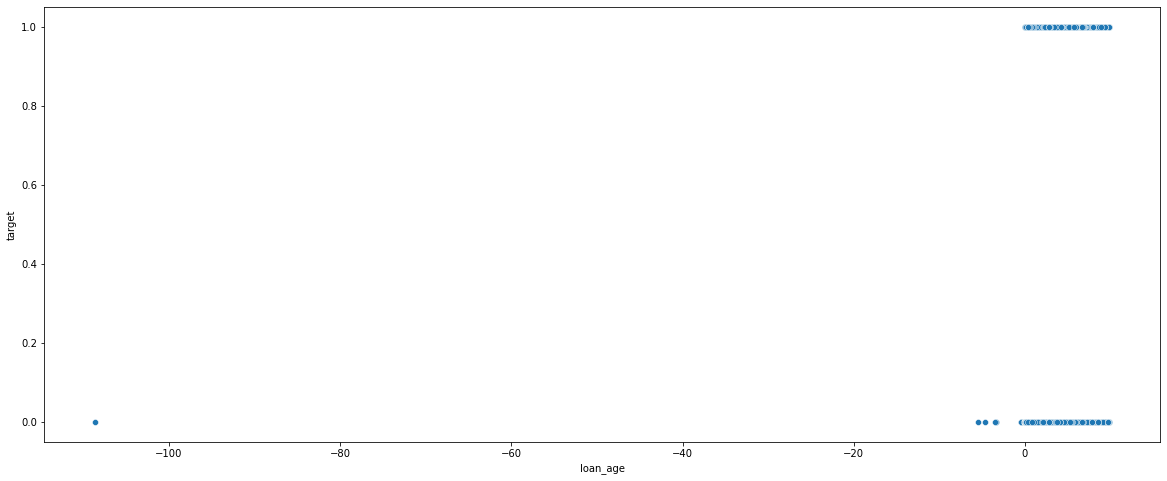

In [37]:
plt.figure(figsize=(20,8))
# sns.barplot(data= acc_flag_df, x='loan_age',y='target')
sns.scatterplot(data=acc_flag_df, x='loan_age',y='target')
plt.show()

In [38]:
acc_flag_df.loan_age.value_counts(ascending=True)

-5.533310          1
-0.120468          1
-0.227246          1
-3.323819          1
-0.498299          1
-3.493569          1
-108.648364        1
-0.197129          1
-0.057496          1
-3.397743          1
-0.479134          1
-4.681821          1
-0.117730          1
 7.433418          6
 7.641498          6
 7.575789         10
 7.515555         10
 7.531982         10
 7.356756         10
 7.548410         11
 7.600430         11
 7.745539         11
 7.625071         11
 7.373184         11
 7.781132         11
 7.466272         11
 7.619595         11
 7.720898         12
 7.657926         12
 7.148675         12
 7.110344         12
 7.529244         12
 9.788018         12
 7.197958         12
 7.400563         12
 7.304736         12
 7.386873         13
 7.567575         13
 7.674353         13
 7.655188         13
 7.589478         13
 7.458059         13
 7.562099         13
 7.085703         13
 6.929643         13
 7.397825         13
 7.033683         13
 7.666140    

In [39]:
acc_flag_df[acc_flag_df.loan_age<0]

,credit_type,loan_amount,amount_overdue,open_date,closed_date,uid,contract_type,target,overdue_month,overdue_month_count,loan_age
65605,Another type of loan,225000.000,0.0,2021-01-01,2020-10-21,BJV01354901,Cash loans,0,[],0,-0.197129
91932,Consumer credit,153000,0.0,2019-07-08,2019-06-17,BXW18347652,Cash loans,0,[],0,-0.057496
143642,Consumer credit,450000,0.0,2017-05-27,2017-04-14,CZP89943956,Revolving loans,0,[],0,-0.117730
147697,Consumer credit,360000,0.0,2013-06-05,2013-03-14,DBX47652567,Cash loans,0,[],0,-0.227246
212896,Credit card,675000,0.0,2019-03-27,2015-11-29,ELL49792531,Cash loans,0,[],0,-3.323819
380416,Consumer credit,711450,0.0,2018-03-17,2012-09-03,HXU23242159,Cash loans,0,[],0,-5.533310
642848,Mortgage,2.25e+06,0.0,2017-03-12,2013-10-18,NLJ87108009,Cash loans,0,[],0,-3.397743
664086,Consumer credit,93564,0.0,2017-06-02,2016-12-02,NWS78995671,Cash loans,0,[],0,-0.498299
752854,Credit card,225000,0.0,2014-08-06,1905-12-13,PSI76661644,Cash loans,0,[],0,-108.648364
920889,Consumer credit,1.35e+06,0.0,2018-07-29,2018-02-04,TFK88667051,Cash loans,0,[],0,-0.479134


**Age can not be a negative value, Need to convert them into positive values**

In [29]:
acc_flag_df.loan_age = acc_flag_df.loan_age.abs()
acc_flag_df.head()

,credit_type,loan_amount,amount_overdue,open_date,closed_date,uid,contract_type,target,overdue_month,overdue_month_count,loan_age
0,Consumer credit,272745,0.0,2018-09-22,2020-02-22,AAA09044550,Cash loans,0,"[000, 000, 000, 000, 000, 000, 000, 010, 000, ...",1,1.418236
1,Consumer credit,4500,0.0,2018-03-08,2019-07-25,AAA09044550,Cash loans,0,"[000, 000, 000, 000, 000, 014, 044, 000, 000, ...",2,1.379905
2,Credit card,80996.4,0.0,2020-06-29,2022-11-20,AAA10545297,Cash loans,0,"[000, 000, 000, 000, 000, 000]",0,2.392931
3,Consumer credit,43771.5,0.0,2020-06-09,2020-09-09,AAA14112888,Cash loans,0,"[000, 000, 000]",0,0.251887
4,Credit card,10480.5,0.0,2014-09-10,2022-11-20,AAA20326915,Cash loans,0,"[000, 000, 000, 000, 000, 000, 000, 000, 000, ...",31,8.194556


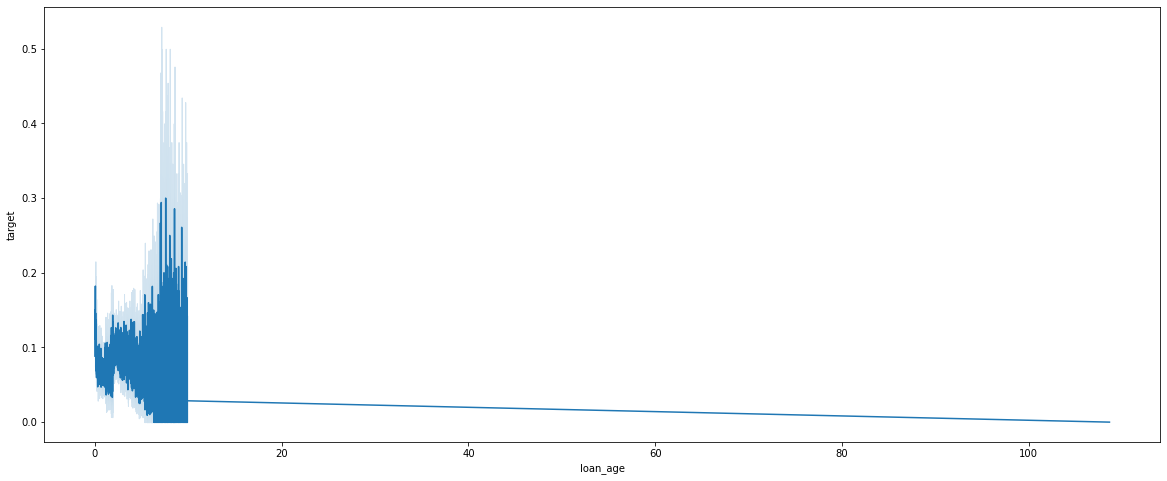

In [41]:
plt.figure(figsize=(20,8))
# sns.barplot(data= acc_flag_df, x='loan_age',y='target')
sns.lineplot(data=acc_flag_df, x='loan_age',y='target')
plt.show()

<AxesSubplot:>

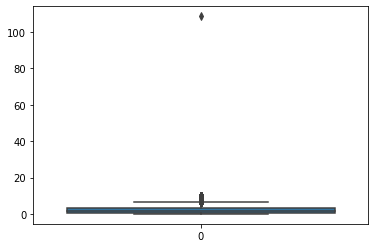

In [42]:
sns.boxplot(acc_flag_df.loan_age)

**We have outlier in our loan_age data, need to handle these outliers**

In [30]:
## Replacing outlier data with maximum upper bound value
q1=acc_flag_df["loan_age"].describe()["25%"]
q3=acc_flag_df["loan_age"].describe()["25%"]
iqr=q3-q1 #interquartile range
# lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
acc_flag_df["loan_age"]=np.where(acc_flag_df["loan_age"]>upper_bound,upper_bound,acc_flag_df["loan_age"])


<AxesSubplot:>

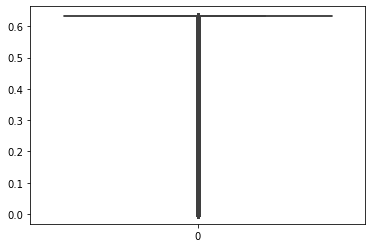

In [44]:
sns.boxplot(acc_flag_df.loan_age)

### Preparing Data for Model training 

In [73]:
acc_flag_df.head()

,credit_type,loan_amount,amount_overdue,open_date,closed_date,uid,contract_type,target,overdue_month,overdue_month_count,loan_age
0,Consumer credit,272745,0.0,2018-09-22,2020-02-22,AAA09044550,Cash loans,0,"[000, 000, 000, 000, 000, 000, 000, 010, 000, ...",1,0.632457
1,Consumer credit,4500,0.0,2018-03-08,2019-07-25,AAA09044550,Cash loans,0,"[000, 000, 000, 000, 000, 014, 044, 000, 000, ...",2,0.632457
2,Credit card,80996.4,0.0,2020-06-29,2022-11-20,AAA10545297,Cash loans,0,"[000, 000, 000, 000, 000, 000]",0,0.632457
3,Consumer credit,43771.5,0.0,2020-06-09,2020-09-09,AAA14112888,Cash loans,0,"[000, 000, 000]",0,0.251887
4,Credit card,10480.5,0.0,2014-09-10,2022-11-20,AAA20326915,Cash loans,0,"[000, 000, 000, 000, 000, 000, 000, 000, 000, ...",31,0.632457


In [31]:
X_train = acc_flag_df[['credit_type','loan_amount','amount_overdue','contract_type','overdue_month_count','loan_age']].copy()
X_train['loan_amount'] = list(map(float, acc_flag_df.loan_amount))
Y = acc_flag_df['target'].copy()

In [35]:
X_train.credit_type.unique()

array(['Consumer credit', 'Credit card', 'Mortgage', 'Car loan',
       'Loan for business development', 'Microloan',
       'Another type of loan', 'Loan for working capital replenishment',
       'Unknown type of loan', 'Loan for the purchase of equipment',
       'Real estate loan', 'Cash loan (non-earmarked)',
       'Loan for purchase of shares (margin lending)', 'Interbank credit',
       'Mobile operator loan'], dtype=object)

In [32]:
# Standardized columns data 
import warnings
warnings.filterwarnings('ignore')

# transform data
df1 = X_train[['loan_amount','amount_overdue','overdue_month_count','loan_age']]
df1['loan_amount'] = (X_train['loan_amount'] - X_train['loan_amount'].mean())/X_train['loan_amount'].std()
df1['amount_overdue'] = (X_train['amount_overdue'] - X_train['amount_overdue'].mean())/X_train['amount_overdue'].std()
df1['overdue_month_count'] = (X_train['overdue_month_count'] - X_train['overdue_month_count'].mean())/X_train['overdue_month_count'].std()
df1['loan_age'] = (X_train['loan_age'] - X_train['loan_age'].mean())/X_train['loan_age'].std()
df1.head()

,loan_amount,amount_overdue,overdue_month_count,loan_age
0,-0.071732,-0.006302,0.449727,0.467604
1,-0.313435,-0.006302,1.075461,0.467604
2,-0.244508,-0.006302,-0.176007,0.467604
3,-0.278050,-0.006302,-0.176007,-2.223016
4,-0.308047,-0.006302,19.221741,0.467604


In [33]:
# df2= X_train[['credit_type','contract_type']]
df2= X_train[['contract_type']]
df2 = pd.get_dummies(df2)
df2.head()

,contract_type_Cash loans,contract_type_Revolving loans
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [34]:
X = pd.concat([df1,df2], axis=1)
X.head()

,loan_amount,amount_overdue,overdue_month_count,loan_age,contract_type_Cash loans,contract_type_Revolving loans
0,-0.071732,-0.006302,0.449727,0.467604,1,0
1,-0.313435,-0.006302,1.075461,0.467604,1,0
2,-0.244508,-0.006302,-0.176007,0.467604,1,0
3,-0.278050,-0.006302,-0.176007,-2.223016,1,0
4,-0.308047,-0.006302,19.221741,0.467604,1,0


In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1245310 entries, 0 to 1245309
Data columns (total 6 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   loan_amount                    1245310 non-null  float64
 1   amount_overdue                 1245310 non-null  float64
 2   overdue_month_count            1245310 non-null  float64
 3   loan_age                       1245310 non-null  float64
 4   contract_type_Cash loans       1245310 non-null  uint8  
 5   contract_type_Revolving loans  1245310 non-null  uint8  
dtypes: float64(4), uint8(2)
memory usage: 49.9 MB


### Training Model


In [36]:
## Splitting Data to Train and Test dataset
from sklearn.model_selection import train_test_split

seed = 555
train_X,test_X,train_y,test_y=train_test_split(X,Y,random_state=seed)

In [37]:
from sklearn.linear_model import LogisticRegression
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier


In [38]:

models=[]
models.append(("Logistic Regression",LogisticRegression()))
# models.append(("Decision Tree",DecisionTreeClassifier()))
# models.append(("Random Forest",RandomForestClassifier()))
# models.append(("SVC",SVC()))
# models.append(("KNN",KNeighborsClassifier()))
# models.append(("Naive Bayes",GaussianNB()))

In [39]:
scoring='accuracy'


In [40]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

result=[]
names=[]


In [41]:
from tqdm import tqdm

for name,model in tqdm(models):
    #print(model)
    kfold=KFold(n_splits=10,random_state=seed)
    cv_result=cross_val_score(model,train_X, train_y,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print("%s %f %f" % (name,cv_result.mean(),cv_result.std()))



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:21<00:00, 21.07s/it]

Logistic Regression 0.921766 0.000741


In [42]:
LRmodel=LogisticRegression()
LRmodel.fit(train_X,train_y)

# Making Predition 
pred=LRmodel.predict(test_X)

print("Accuracy Score", accuracy_score(test_y,pred))
print("Confusion Matrix", confusion_matrix(test_y,pred))
print("Classificaiton Report", classification_report(test_y,pred))
print("Roc_AUC Score", roc_auc_score(test_y, pred))

Accuracy Score 0.921430131565423
Confusion Matrix [[286867      3]
 [ 24458      0]]
Classificaiton Report               precision    recall  f1-score   support

           0       0.92      1.00      0.96    286870
           1       0.00      0.00      0.00     24458

    accuracy                           0.92    311328
   macro avg       0.46      0.50      0.48    311328
weighted avg       0.85      0.92      0.88    311328

Roc_AUC Score 0.49999477115069546


In [ ]:
## KNN Model

kfold=KFold(n_splits=10,random_state=seed)
cv_result=cross_val_score(KNeighborsClassifier(), train_X, train_y, cv=kfold,scoring=scoring,verbose=10)
# result.append(cv_result)
# names.append(name)
print("%s %f %f" % ('KNN Classifier',cv_result.mean(),cv_result.std()))

knnModel = KNeighborsClassifier()
knnModel.fit(train_X,train_y)

# Making Predition 
pred=knnModel.predict(test_X)

print("Accuracy Score", accuracy_score(test_y,pred))
print("Confusion Matrix", confusion_matrix(test_y,pred))
print("Classificaiton Report", classification_report(test_y,pred))
print("Roc_AUC Score", roc_auc_score(test_y, pred))

In [49]:
# models_rest = []

# models_rest.append(("KNN",KNeighborsClassifier()))
# models_rest.append(("Naive Bayes",GaussianNB()))

# for name,model in tqdm(models):
#     #print(model)
#     kfold=KFold(n_splits=10,random_state=seed)
#     cv_result=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
#     result.append(cv_result)
#     names.append(name)
#     print("%s %f %f" % (name,cv_result.mean(),cv_result.std()))


In [43]:
# Loading train Dataset
test_account = pd.read_json('./test/accounts_data_test.json')
test_enquiry = pd.read_json('./test/enquiry_data_test.json')
test_flag = pd.read_csv('./test/test_flag.csv')

# Transform JSON to Dataframe
l = list()
for i in test_account.values:
    for val in i:
        if val:
            l.append(val)
test_acc_df = pd.DataFrame.from_records(l)
test_acc_df.closed_date.fillna('2022-11-20', inplace=True)

l = list()
for i in test_enquiry.values:
    for val in i:
        if val:
            l.append(val)
test_enq_df = pd.DataFrame.from_records(l)

##Merging data 
test_acc_flag_df = test_acc_df.merge(test_flag, how='left', on='uid')
test_enq_flag_df = test_enq_df.merge(test_flag, how='left', on='uid')

# Processs data before predicting 
test_acc_flag_df['overdue_month'] = test_acc_flag_df.payment_hist_string.apply(lambda s:[s[i:i+3] for i in range(0,len(s),3)])
test_acc_flag_df['overdue_month_count'] = test_acc_flag_df.overdue_month.apply(lambda x:len(x) - x.count('000'))
test_acc_flag_df.rename(columns={'NAME_CONTRACT_TYPE':'contract_type',
                           'TARGET':'target',
                            
                           }, inplace=True)
test_acc_flag_df.drop('payment_hist_string', axis=1, inplace=True)

## Calculating Loan Age
test_acc_flag_df['closed_date'] = pd.to_datetime(test_acc_flag_df['closed_date'])
test_acc_flag_df['open_date'] = pd.to_datetime(test_acc_flag_df['open_date'])

test_acc_flag_df['loan_age']= (test_acc_flag_df.closed_date - test_acc_flag_df.open_date)/np.timedelta64(1, 'Y')

In [44]:
test_flag.head()

,uid,NAME_CONTRACT_TYPE
0,CMO22835242,Cash loans
1,MRJ34316727,Cash loans
2,UAV00534378,Cash loans
3,IPQ08190402,Cash loans
4,NQN84331006,Cash loans


In [45]:
test_acc_flag_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220013 entries, 0 to 220012
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   credit_type          220013 non-null  object        
 1   loan_amount          220013 non-null  float64       
 2   amount_overdue       220013 non-null  float64       
 3   open_date            220013 non-null  datetime64[ns]
 4   closed_date          220013 non-null  datetime64[ns]
 5   uid                  220013 non-null  object        
 6   contract_type        220013 non-null  object        
 7   overdue_month        220013 non-null  object        
 8   overdue_month_count  220013 non-null  int64         
 9   loan_age             220013 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 18.5+ MB


In [46]:
test_df1 = test_acc_flag_df[['loan_amount','amount_overdue','overdue_month_count','loan_age']]
test_df1['loan_amount'] = (test_acc_flag_df['loan_amount'] - test_acc_flag_df['loan_amount'].mean())/test_acc_flag_df['loan_amount'].std()
test_df1['amount_overdue'] = (test_acc_flag_df['amount_overdue'] - test_acc_flag_df['amount_overdue'].mean())/test_acc_flag_df['amount_overdue'].std()
test_df1['overdue_month_count'] = (test_acc_flag_df['overdue_month_count'] - test_acc_flag_df['overdue_month_count'].mean())/test_acc_flag_df['overdue_month_count'].std()
test_df1['loan_age'] = (test_acc_flag_df['loan_age'] - test_acc_flag_df['loan_age'].mean())/test_acc_flag_df['loan_age'].std()
test_df1.head()

,loan_amount,amount_overdue,overdue_month_count,loan_age
0,-0.360852,-0.009063,-0.180592,-0.774411
1,-0.380266,-0.009063,-0.180592,-0.908915
2,-0.335331,-0.009063,-0.180592,0.939386
3,-0.366047,-0.009063,-0.180592,-0.570387
4,-0.140240,-0.009063,6.330604,0.144450


In [47]:
test_df2= test_acc_flag_df[['contract_type']]
test_df2 = pd.get_dummies(test_df2)
test_df2.head()

,contract_type_Cash loans,contract_type_Revolving loans
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [48]:
X_test = pd.concat([test_df1, test_df2], axis=1)


In [49]:
train_X.head()

,loan_amount,amount_overdue,overdue_month_count,loan_age,contract_type_Cash loans,contract_type_Revolving loans
1205738,-0.256831,-0.006302,-0.176007,0.467604,0,1
180939,-0.276943,-0.006302,-0.176007,0.467604,1,0
629298,0.152861,-0.006302,-0.176007,0.467604,1,0
75182,-0.236395,-0.006302,-0.176007,0.467604,1,0
971329,-0.195848,-0.006302,-0.176007,0.467604,1,0


In [50]:
X_test.head()

,loan_amount,amount_overdue,overdue_month_count,loan_age,contract_type_Cash loans,contract_type_Revolving loans
0,-0.360852,-0.009063,-0.180592,-0.774411,1,0
1,-0.380266,-0.009063,-0.180592,-0.908915,1,0
2,-0.335331,-0.009063,-0.180592,0.939386,1,0
3,-0.366047,-0.009063,-0.180592,-0.570387,1,0
4,-0.140240,-0.009063,6.330604,0.144450,1,0


In [51]:
train_X.shape, X_test.shape

((933982, 6), (220013, 6))

In [52]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220013 entries, 0 to 220012
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   loan_amount                    220013 non-null  float64
 1   amount_overdue                 220013 non-null  float64
 2   overdue_month_count            220013 non-null  float64
 3   loan_age                       220013 non-null  float64
 4   contract_type_Cash loans       220013 non-null  uint8  
 5   contract_type_Revolving loans  220013 non-null  uint8  
dtypes: float64(4), uint8(2)
memory usage: 8.8 MB


In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

LRmodel=LogisticRegression()
LRmodel.fit(train_X,train_y)

# Making Predition 
pred=LRmodel.predict(X_test)



In [54]:
# creating submission data
df = pd.DataFrame()
df['uid'] = test_acc_flag_df.uid
df['pred'] = pred
df.head()

,uid,pred
0,AAA14437029,0
1,AAA14437029,0
2,AAA14437029,0
3,AAA14437029,0
4,AAA14437029,0


In [55]:
df.pred.value_counts()

0    220010
1         3
Name: pred, dtype: int64

In [56]:
df.to_csv('final_submission_ajay_solanki.csv',index=False)